# Multivariate Analysis
## - Explore relationships among multiple features <br> - Use techniques such as heatmaps, 3D plots, or dimensionality reduction methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../data/regional_multivariate_data.csv")

df['date'] = pd.to_datetime(df['date'])
df.head()

/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


FileNotFoundError: [Errno 2] No such file or directory: '../data/regional_multivariate_data.csv'

<AxesSubplot:>

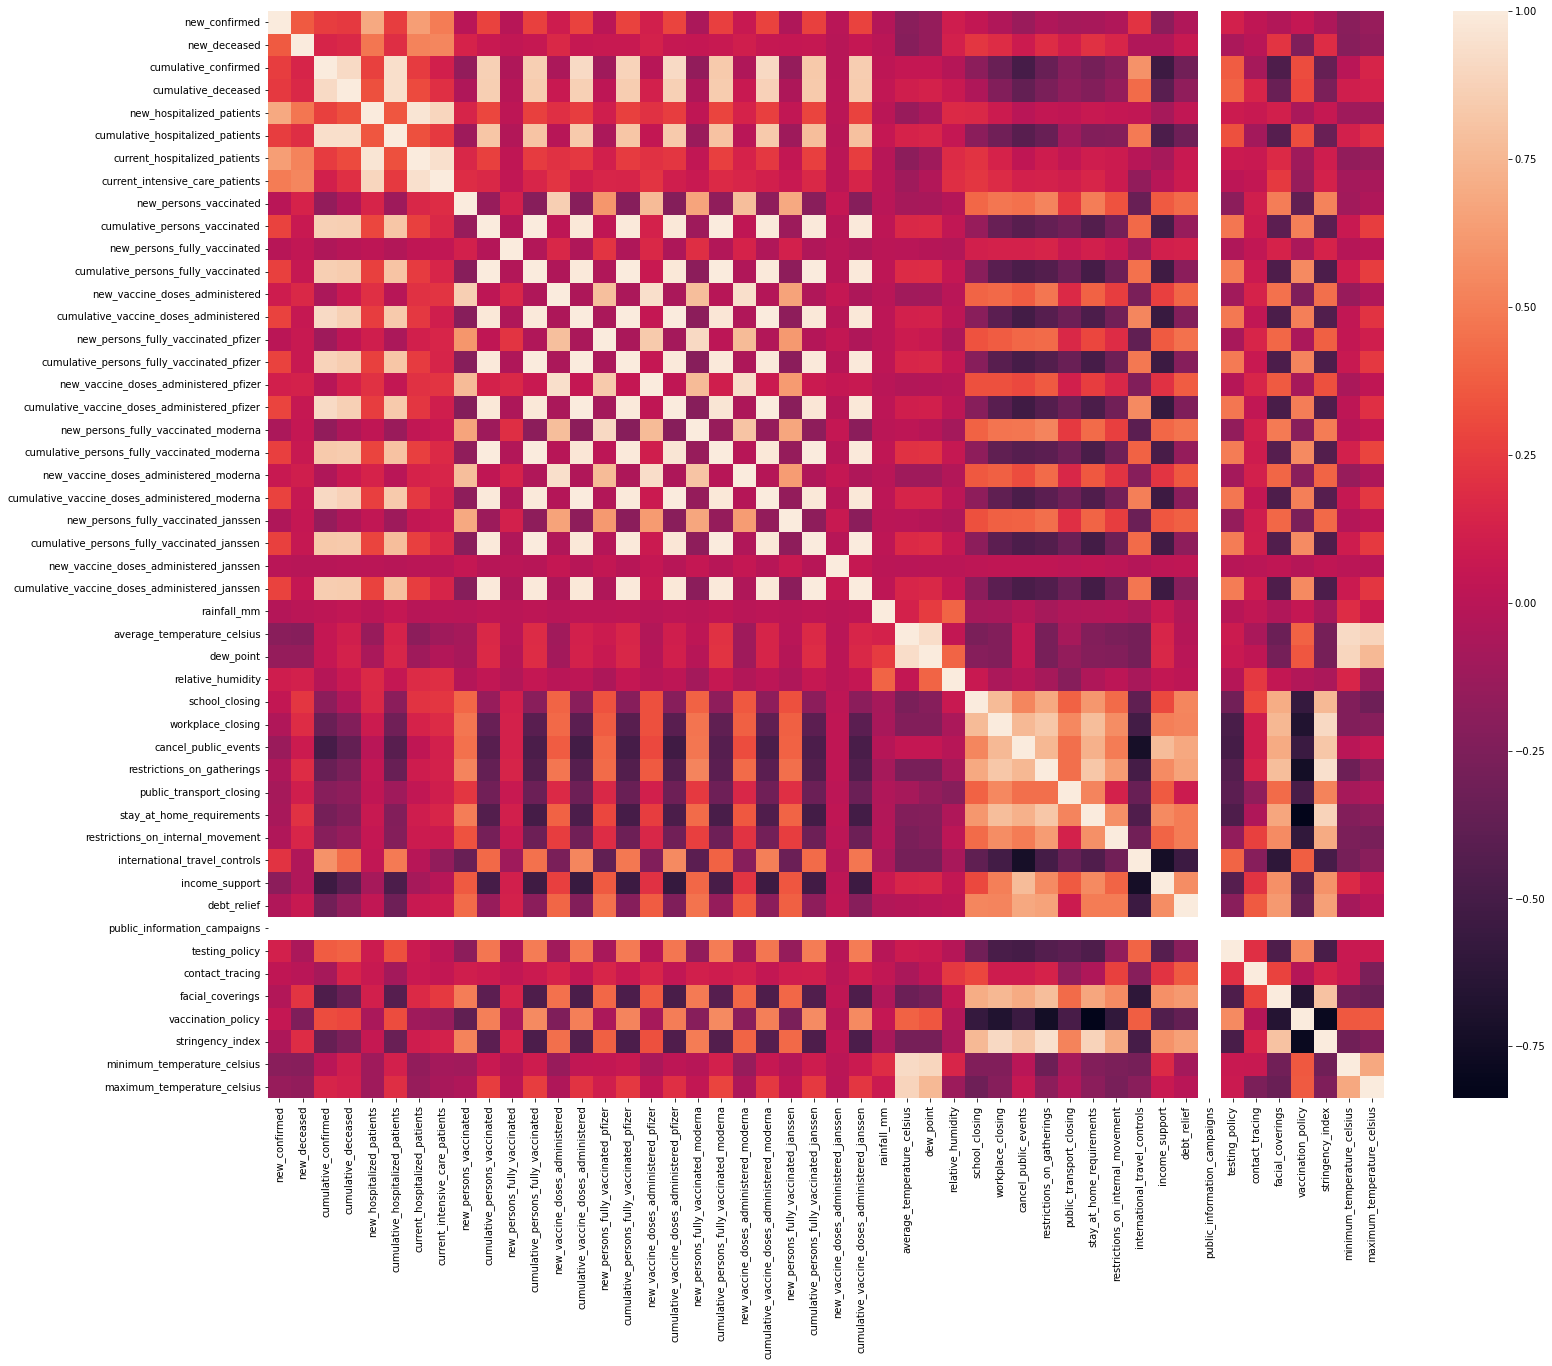

In [ ]:
numeric_data = df.iloc[:, 2:50]
plt.figure(figsize=(25, 20))
sns.heatmap(numeric_data.corr())

In [ ]:
corr = numeric_data.corr()
signif_corrs = corr[abs(corr['new_confirmed']) > 0.3]['new_confirmed']
signif_corrs


new_confirmed                      1.000000
new_deceased                       0.365833
new_hospitalized_patients          0.691258
current_hospitalized_patients      0.635865
current_intensive_care_patients    0.490869
Name: new_confirmed, dtype: float64

# Findings
### Only 4 features have a moderately significant or significant correlation (abs > 0.3) with new_confirmed, all of which relate to deaths/hospital statistics <br> For stats with both "new" and "cumulative" features, correlation is very high which is expected. Right now, these are not considered in further analysis

In [ ]:
groups = []

signif_corrs = numeric_data.corr()['new_confirmed'][abs(numeric_data.corr()['new_confirmed']) > 0.5].index

for feature in signif_corrs:
    if feature == "new_confirmed":
        continue

    corr2 = numeric_data.corr()[feature]
    double_sig_corrs = corr2[abs(corr2) > 0.5].index

    for i in double_sig_corrs:
        if i == feature or i == "new_confirmed":
            continue
        new_group = sorted(list(set(['new_confirmed', feature, i]))) 
        if new_group not in groups:  
            groups.append(new_group)

groups = [list(set(group)) for group in groups] 
unique_groups = []  
for group in groups:
    if group not in unique_groups:
        unique_groups.append(group)

ordered_groups = []
for group in groups:
    ordered_group = ['new_confirmed'] + [g for g in group if g != 'new_confirmed']
    ordered_groups.append(ordered_group)

ordered_groups

[['new_confirmed',
  'current_hospitalized_patients',
  'new_hospitalized_patients'],
 ['new_confirmed',
  'new_hospitalized_patients',
  'current_intensive_care_patients'],
 ['new_confirmed', 'current_hospitalized_patients', 'new_deceased'],
 ['new_confirmed',
  'current_hospitalized_patients',
  'current_intensive_care_patients']]

## Looking at groups of 3 variables that all have at least moderate correlations with each other (abs > 0.3). Only 4 such unique pairs exist. 

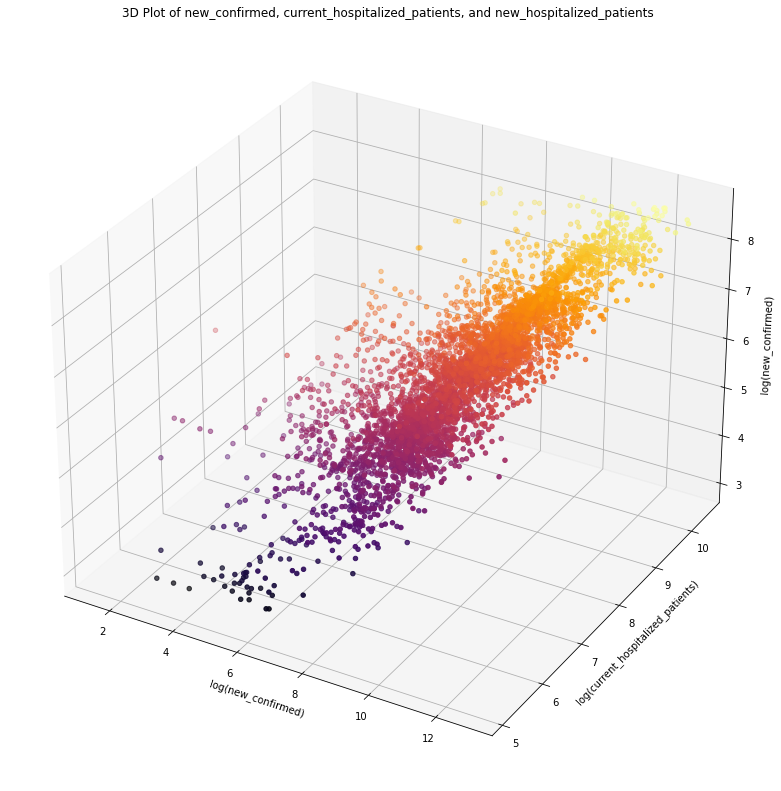

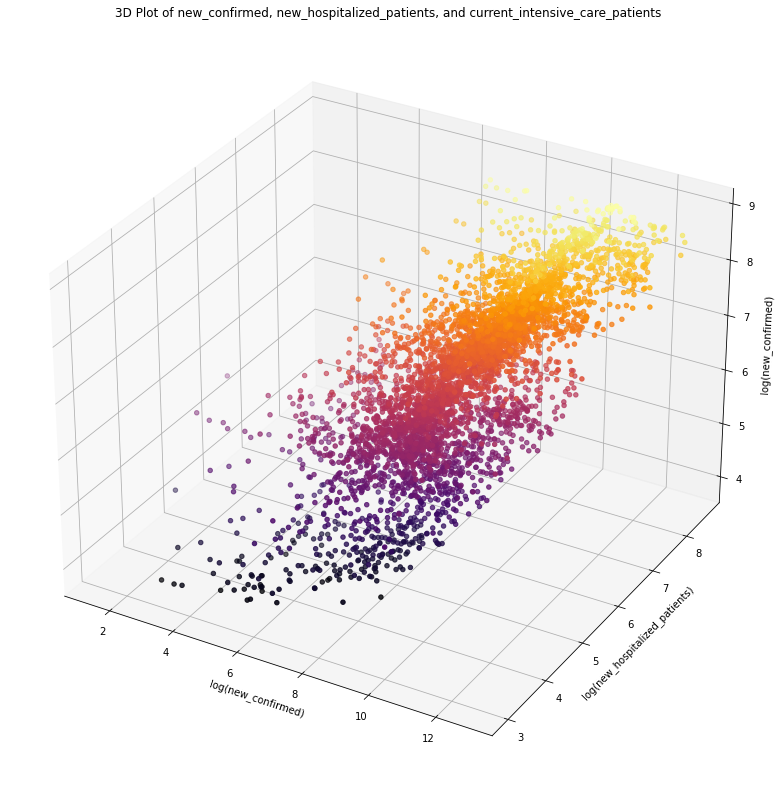

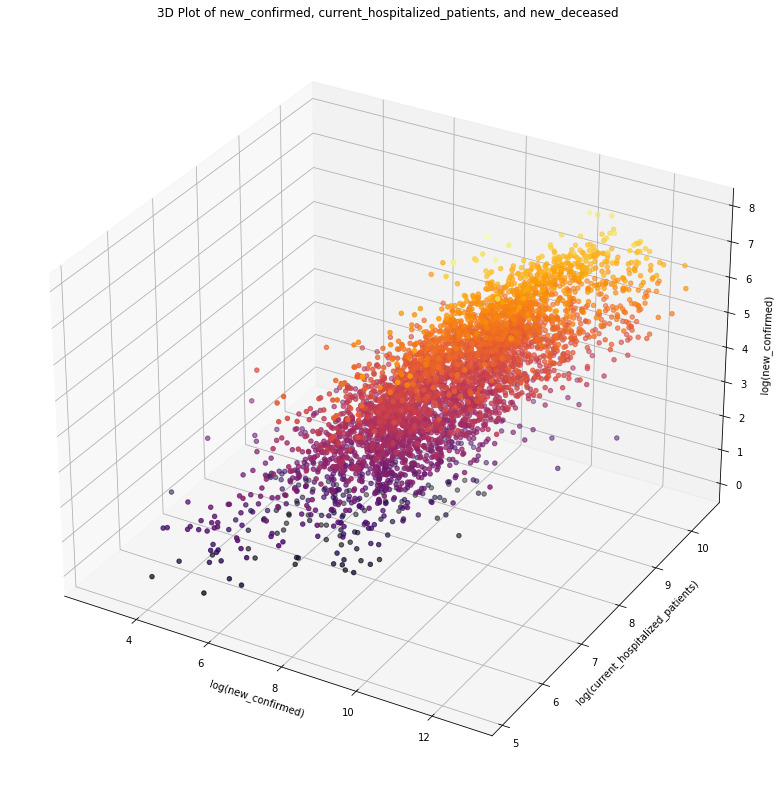

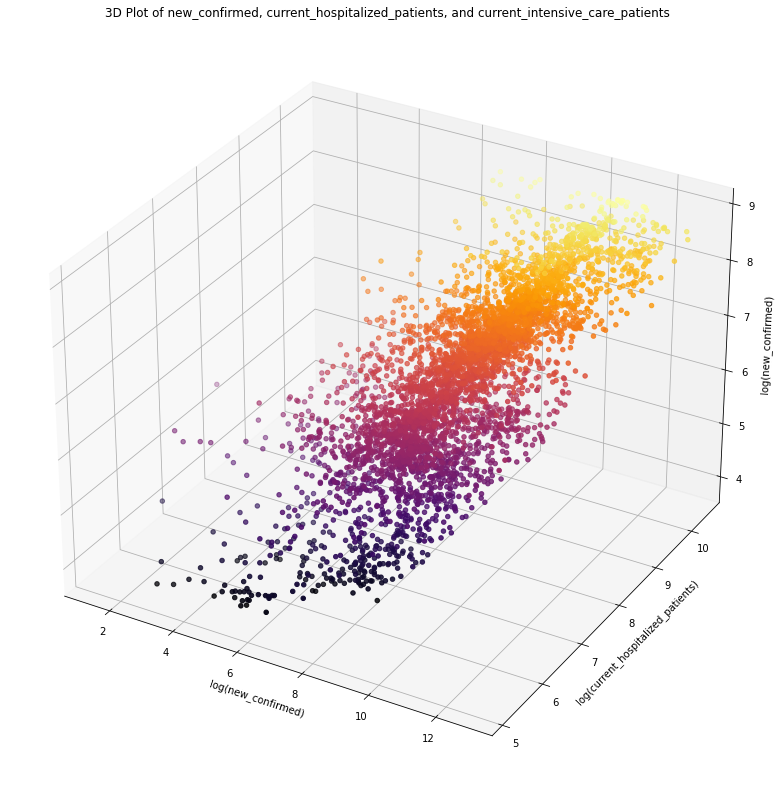

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=len(ordered_groups), figsize=(30, 8))

for group in ordered_groups:
    fig = plt.figure(figsize=(20, 14))
    ax = fig.add_subplot(111, projection='3d')


    x, y, z = group

    ax.scatter(np.log(numeric_data[x]), np.log(numeric_data[y]), np.log(numeric_data[z]), c=np.log(numeric_data[z]), cmap='inferno')

    ax.set_xlabel(f"log({x})")
    ax.set_ylabel(f"log({y})")
    ax.set_zlabel(f"log({x})")
    
    ax.set_title(f'3D Plot of {x}, {y}, and {z}')
    
    plt.show()

## Log transformations enable easier visualizations. Subplot format is below.

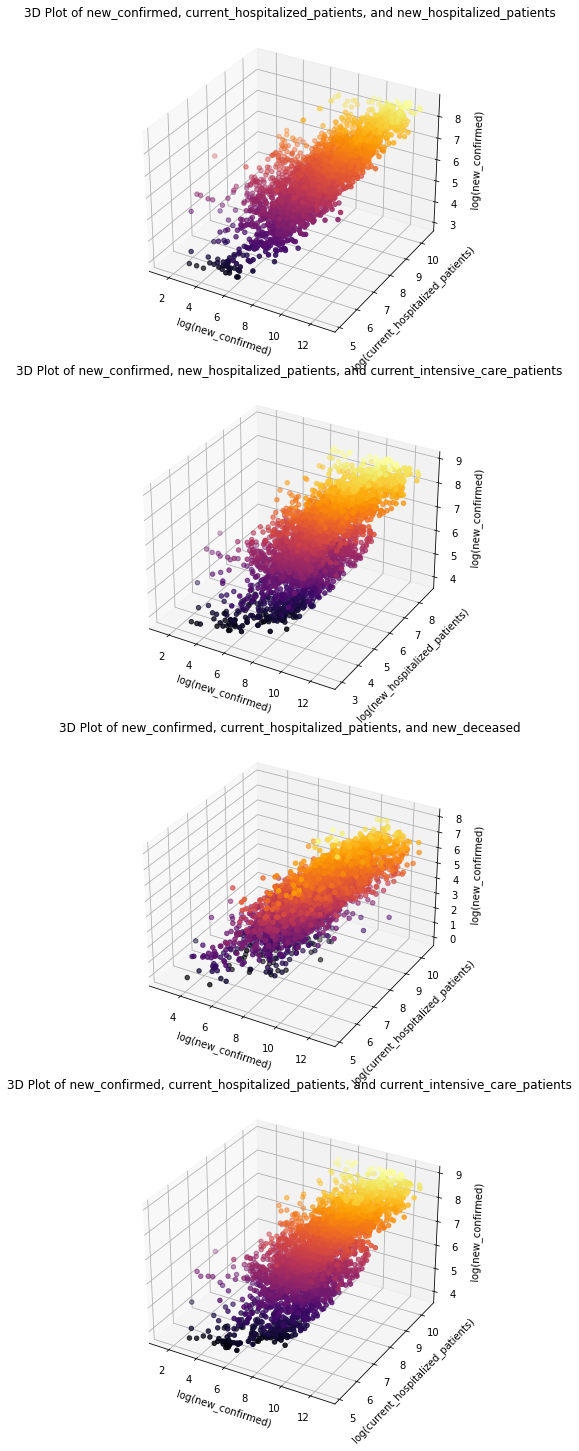

In [ ]:
num_plots = len(ordered_groups)

fig = plt.figure(figsize=(25, num_plots * 5))

for i, group in enumerate(ordered_groups, start=1):
    ax = fig.add_subplot(num_plots, 1, i, projection='3d')
    x, y, z = group

    ax.scatter(np.log(numeric_data[x]), np.log(numeric_data[y]), np.log(numeric_data[z]), c=np.log(numeric_data[z]), cmap='inferno')

    ax.set_xlabel(f"log({x})")
    ax.set_ylabel(f"log({y})")
    ax.set_zlabel(f"log({x})")

    ax.set_title(f'3D Plot of {x}, {y}, and {z}')

plt.tight_layout()
plt.show()